In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder, MinMaxScaler

# pour éviter les warnings
from warnings import filterwarnings
filterwarnings('ignore')

## K-Means Clustering 

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

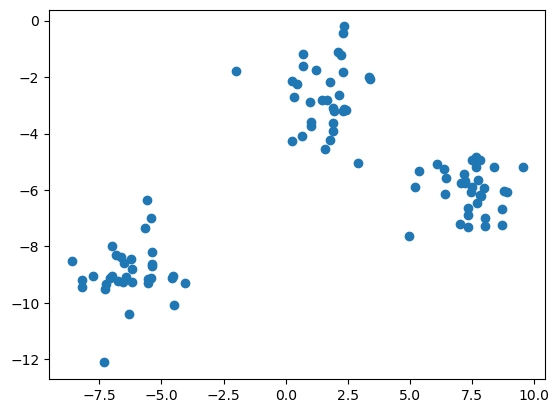

In [7]:
# Génération de données

X, y = make_blobs(n_samples = 100, centers = 3)
plt.scatter(X[:, 0], X[:, 1])

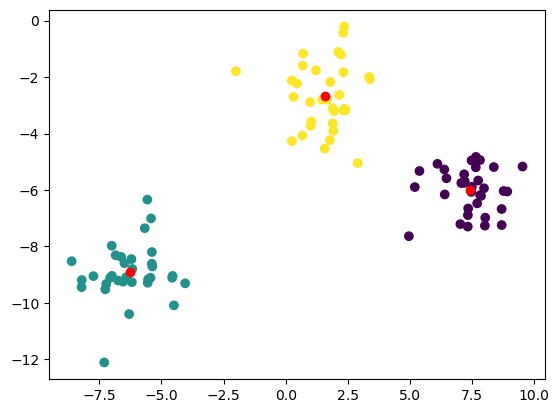

In [11]:
model = KMeans(n_clusters = 3)
model.fit(X)
model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = model.predict(X))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c = 'r')

In [12]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters = k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Couts du modèle (Inertia)')

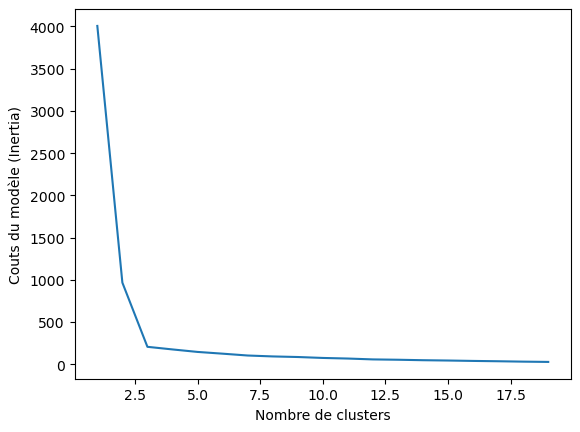

In [13]:
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Couts du modèle (Inertia)')

## IsolationForest : détection d'anomalies

In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.exceptions import NotFittedError

In [18]:
model = IsolationForest(contamination = 0.01)
model.fit(X)

IsolationForest(contamination=0.01)

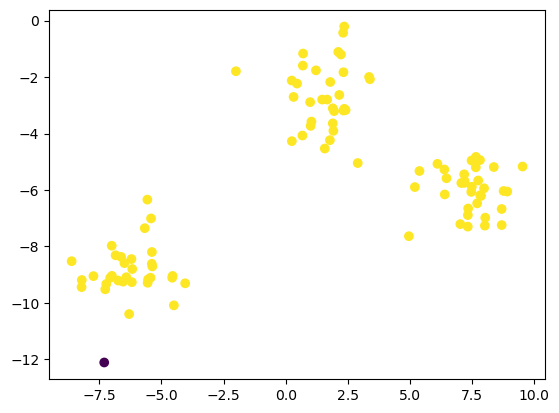

In [19]:
plt.scatter(X[:, 0], X[:, 1], c = model.predict(X))

## Application Décontamination Digits

In [20]:
from sklearn.datasets import load_digits

In [22]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

X.shape

(1797, 64)

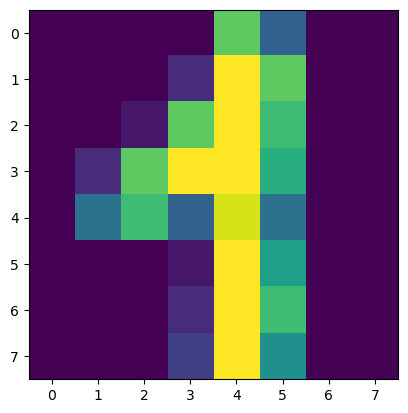

In [23]:
plt.imshow(images[42])

In [24]:
model = IsolationForest(random_state = 0, contamination = 0.02)
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [25]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
# Le modèle renvoie -1 pour les anomalies et 1 pour les données normales
# On stock dans outliers les anomalies
outliers = model.predict(X) == -1

In [27]:
outliers

array([False, False, False, ..., False, False, False])

In [28]:
# on applique outliers à notre image
images[outliers]

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [29]:
# Première image
images[outliers][0]

array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

Text(0.5, 1.0, '2')

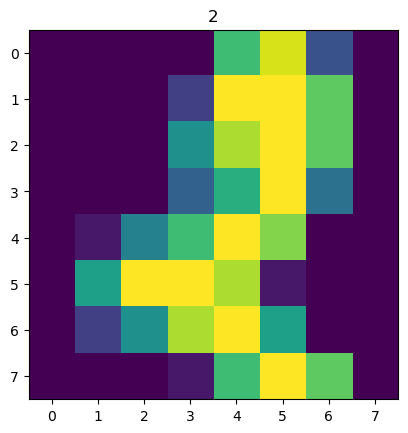

In [31]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0]) # pour voir le digit erroné

## PCA (Analyse en composante principale) : Réduction de dimension

In [32]:
from sklearn.decomposition import PCA

In [33]:
X.shape

(1797, 64)

In [34]:
model = PCA(n_components = 2)
model.fit_transform(X).shape
# la dimension a bien été réduite

(1797, 2)

In [35]:
X_reduced = model.fit_transform(X)

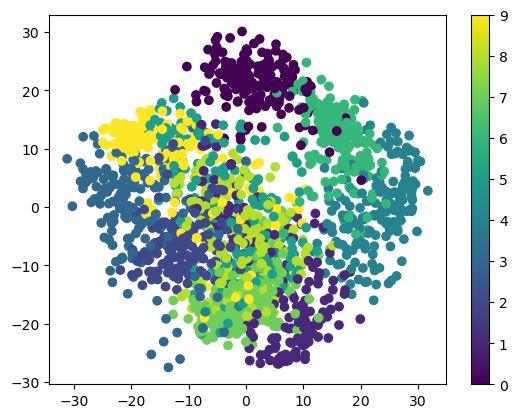

In [36]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y)
plt.colorbar()

In [37]:
# Pour voir le contenu de chaque axe (composante)
model.components_

array([[-0.00000000e+00, -1.73094623e-02, -2.23428828e-01,
        -1.35913357e-01, -3.30323381e-02, -9.66340887e-02,
        -8.32945457e-03,  2.26899470e-03, -3.20516291e-04,
        -1.19308880e-01, -2.44451670e-01,  1.48512682e-01,
        -4.67319461e-02, -2.17740744e-01, -1.48137018e-02,
         4.47778981e-03, -4.94135800e-05, -7.95418972e-02,
         8.33951659e-02,  2.15915293e-01, -1.72126748e-01,
        -1.63712093e-01,  2.86444198e-02,  4.23251598e-03,
         9.85488710e-05,  6.42319483e-02,  2.54093349e-01,
        -3.56771569e-02, -2.09462552e-01, -4.31311710e-02,
         5.13118443e-02,  2.13422617e-04, -0.00000000e+00,
         1.59950910e-01,  3.68690777e-01,  1.64406806e-01,
         8.52008092e-02,  3.72982639e-02,  2.15866772e-02,
        -0.00000000e+00,  1.28865608e-03,  1.06945312e-01,
         3.03067475e-01,  2.47813061e-01,  2.09637315e-01,
         1.22325326e-02, -3.69458777e-02,  1.61484825e-03,
         6.93023417e-04, -8.35143766e-03, -5.58598996e-0

In [38]:
model.components_.shape

# on a (2, 64) parceque chaque composante est une combinaison linéaire entre les composantes et les varibales de X

(2, 64)